# Regresiones — Lineal, Polinómica y Múltiple


## 1) Teoría

**Regresión** = ajustar una función f(x) que relacione variables para **predecir valores continuos**.

- **Mínimos cuadrados:** escoger parámetros que minimicen la suma de errores cuadrados.
- **Lineal simple:** y = a x + b
- **Polinómica:** y = a3 x³ + a2 x² + a1 x + a0
- **Lineal múltiple:** y = β₀ + β₁x₁ + ... + βₚxₚ

**Métricas:**
- MSE → Error cuadrático medio
- MAE → Error absoluto medio
- R² → Varianza explicada

## 2️⃣ Regresión lineal simple (mini dataset sintético)

Pendiente: 0.97
Intercepto: 3.5
MSE: 0.1526
MAE: 0.352
R²: 0.925


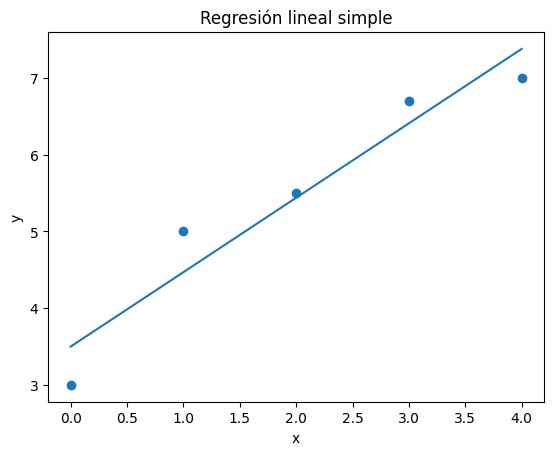

In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = np.array([0,1,2,3,4]).reshape(-1,1)
y = np.array([3.0,5.0,5.5,6.7,7.0])

lin = LinearRegression().fit(X, y)
y_pred = lin.predict(X)

print('Pendiente:', round(lin.coef_[0],4))
print('Intercepto:', round(lin.intercept_,4))
print('MSE:', round(mean_squared_error(y, y_pred),4))
print('MAE:', round(mean_absolute_error(y, y_pred),4))
print('R²:', round(r2_score(y, y_pred),4))

plt.figure()
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.title('Regresión lineal simple')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

## 3️⃣ Regresión polinómica (curvatura)

R² (grado 3): 0.7364


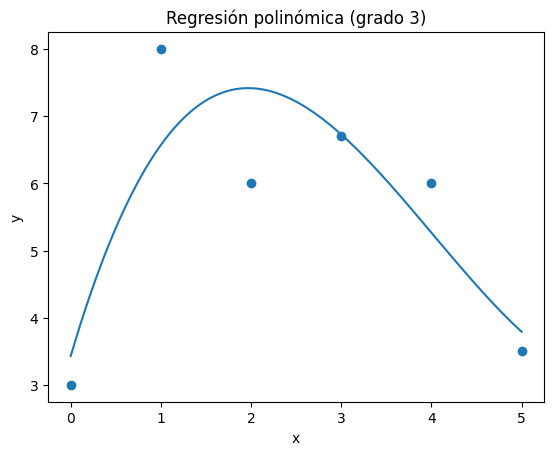

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_poly = np.array([0,1,2,3,4,5]).reshape(-1,1)
y_poly = np.array([3.0,8.0,6.0,6.7,6.0,3.5])

poly3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly3.fit(X_poly, y_poly)
y_pred = poly3.predict(X_poly)

print('R² (grado 3):', round(r2_score(y_poly, y_pred),4))

xx = np.linspace(0,5,200).reshape(-1,1)
plt.scatter(X_poly, y_poly)
plt.plot(xx, poly3.predict(xx))
plt.title('Regresión polinómica (grado 3)')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

## 4️⃣ Regresión lineal múltiple (dataset real: Diabetes)

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MSE:', round(mean_squared_error(y_test, y_pred),4))
print('MAE:', round(mean_absolute_error(y_test, y_pred),4))
print('R²:', round(r2_score(y_test, y_pred),4))

feature_names = load_diabetes().feature_names
coef_table = pd.DataFrame({'Variable': feature_names, 'Coeficiente': model.coef_}).sort_values('Coeficiente')
coef_table

MSE: 2848.3107
MAE: 41.5485
R²: 0.4849


,Variable,Coeficiente
4,s1,-918.502905
1,sex,-241.990907
9,s6,26.324582
0,age,47.749681
6,s3,116.950164
7,s4,269.492303
3,bp,381.562862
5,s2,508.257783
2,bmi,531.971063
8,s5,695.808117


## 5️⃣ Regresión logística (clasificación binaria)

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000, solver="lbfgs", n_jobs=-1, random_state=42)
)

pipe.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, pipe.predict(X_test)))

Accuracy: 0.986013986013986


## Ejercicios
1. **Lineal vs. Polinómica:** prueba grados 2, 3 y 4. Compara R² y MSE. ¿Cuándo aparece sobreajuste?
2. **Importancia de variables (múltiple):** interpreta los coeficientes del dataset *Diabetes*.
3. **Errores:** calcula MAE y MSE en train y test. ¿Cuál es mayor? ¿Por qué?
4. Aplica StandardScaler en un Pipeline con la regresión polinómica.
5. Usa statsmodels y compara pendiente/intercepto con los de sklearn.